In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

stock = yf.Ticker("AAPL")
data = stock.history(start="2015-01-01", end="2025-01-01", auto_adjust=False)

In [2]:
ts_data = data['Close']

In [3]:
import numpy as np

# Փակման գների լոգարիթմական եկամտաբերություն
log_returns = np.log(ts_data / ts_data.shift(1)).dropna()

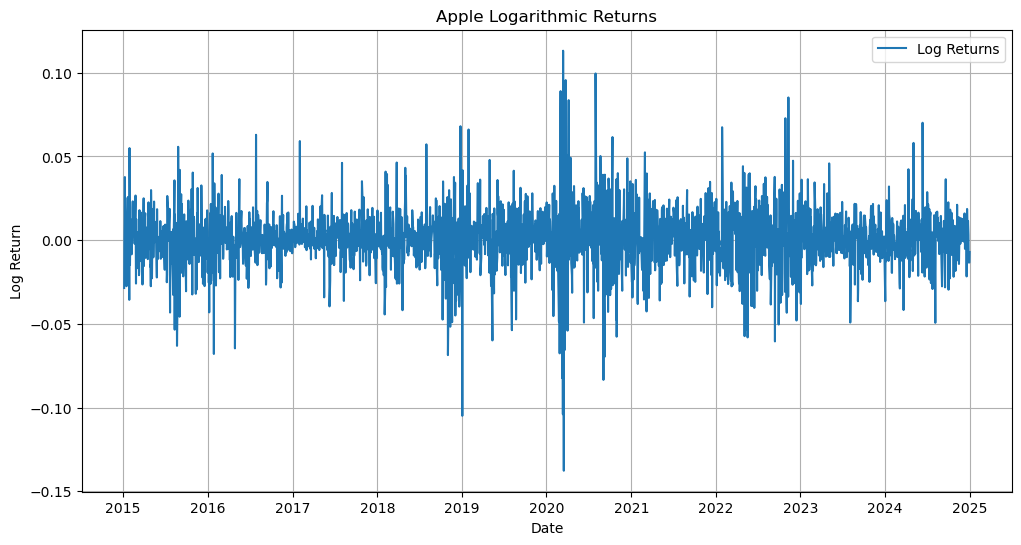

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(log_returns, label='Log Returns')
plt.title("Apple Logarithmic Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller


# Կատարել ADF թեստը
adf_result = adfuller(log_returns)

# Տպել արդյունքները
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

# Մեկնաբանություն (հիման վրա 0.05 նշանակալիության մակարդակի)
if adf_result[1] <= 0.05:
    print("Մերժում ենք զրոյական վարկածը. Ժամանակային շարքը ստացիոնար է։")
else:
    print("Չենք մերժում զրոյական վարկածը. Ժամանակային շարքը ստացիոնար չէ։")

ADF Statistic: -15.565789919229868
p-value: 2.0156673724367742e-28
Critical Values:
	1%: -3.432962135264372
	5%: -2.862694028699462
	10%: -2.567384333962417
Մերժում ենք զրոյական վարկածը. Ժամանակային շարքը ստացիոնար է։


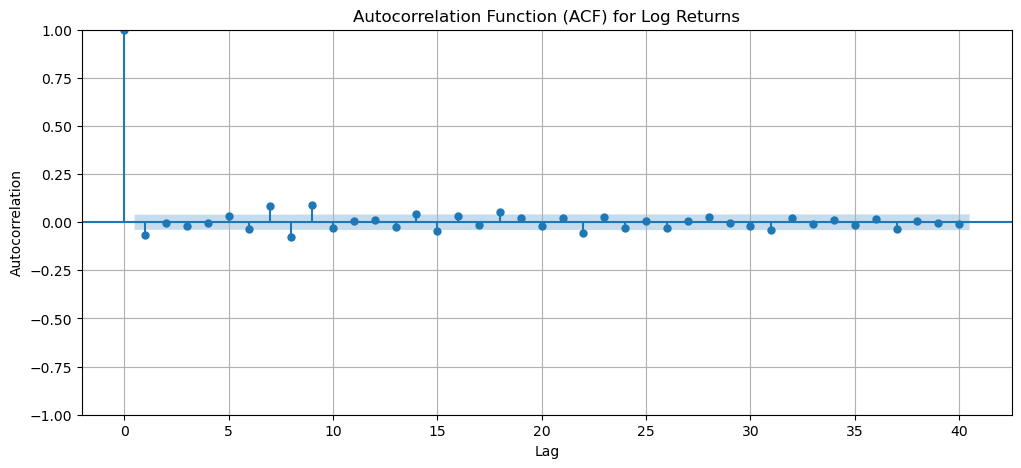

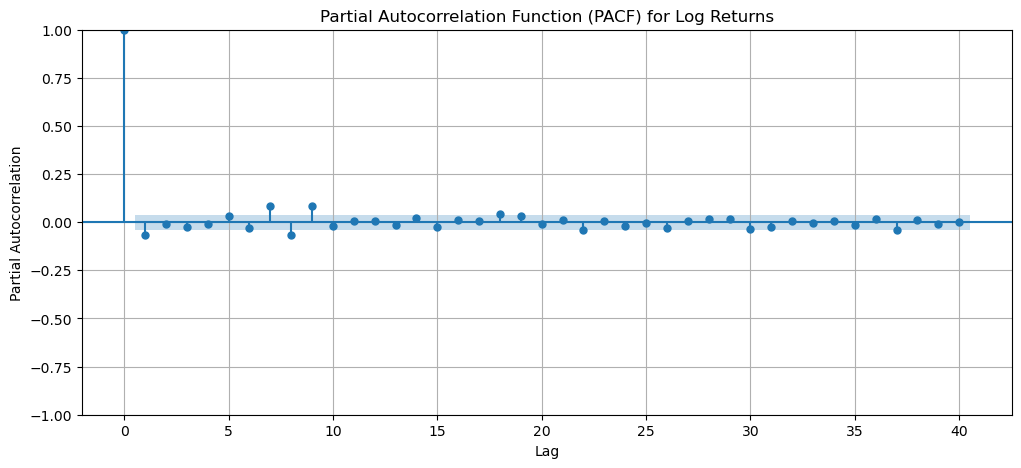

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd # Համոզվելու համար, որ pandas-ը ներմուծված է log_returns-ի համար

# Ենթադրելով, որ log_returns-ը արդեն հաշվարկված է և pandas Series է

# Կառուցել ACF գրաֆիկը
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(log_returns, lags=40, ax=ax) # Կարող եք փոխել lags-ի քանակը
plt.title('Autocorrelation Function (ACF) for Log Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Կառուցել PACF գրաֆիկը
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(log_returns, lags=40, ax=ax) # Կարող եք փոխել lags-ի քանակը
plt.title('Partial Autocorrelation Function (PACF) for Log Returns')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [7]:
# Բաժանել տվյալները մարզման և թեստավորման մասերի
# Որպես բաժանման կետ վերցնում ենք 2024-01-01
split_date = '2024-01-01'

train_data = log_returns[log_returns.index < split_date]
test_data = log_returns[log_returns.index >= split_date]

print(f"Մարզման տվյալների քանակը: {len(train_data)}")
print(f"Թեստավորման տվյալների քանակը: {len(test_data)}")
print(f"Մարզման տվյալների միջակայքը: {train_data.index.min()} - {train_data.index.max()}")
print(f"Թեստավորման տվյալների միջակայքը: {test_data.index.min()} - {test_data.index.max()}")

Մարզման տվյալների քանակը: 2263
Թեստավորման տվյալների քանակը: 252
Մարզման տվյալների միջակայքը: 2015-01-05 00:00:00-05:00 - 2023-12-29 00:00:00-05:00
Թեստավորման տվյալների միջակայքը: 2024-01-02 00:00:00-05:00 - 2024-12-31 00:00:00-05:00


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Կիրառել ARIMA մոդելը ՄԻԱՅՆ մարզման տվյալների վրա
# Օգտագործում ենք մեր նախնական ընտրությունը՝ (1, 0, 1)
model_arima = ARIMA(train_data, order=(1, 0, 1))

# Կիրառել մոդելը
results_arima = model_arima.fit()

# Տպել մոդելի արդյունքների ամփոփումը մարզման տվյալների հիման վրա
print("\nARIMA Մոդելի Արդյունքները (Մարզման Տվյալների Հիման Վրա):")
print(results_arima.summary())

# Ստանալ մոդելի մնացորդները մարզման տվյալներից
# Այս մնացորդները մեզ պետք են GARCH մոդելավորման համար
arima_residuals = results_arima.resid

# Հիմա ունեք arima_residuals փոփոխականը, որը պարունակում է մնացորդները

/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA Մոդելի Արդյունքները (Մարզման Տվյալների Հիման Վրա):
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2263
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5848.932
Date:                Thu, 24 Apr 2025   AIC                         -11689.864
Time:                        14:38:07   BIC                         -11666.966
Sample:                             0   HQIC                        -11681.508
                               - 2263                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.338      0.019       0.000       0.002
ar.L1          0.0868      0.172      0.506      0.613      -0.249       

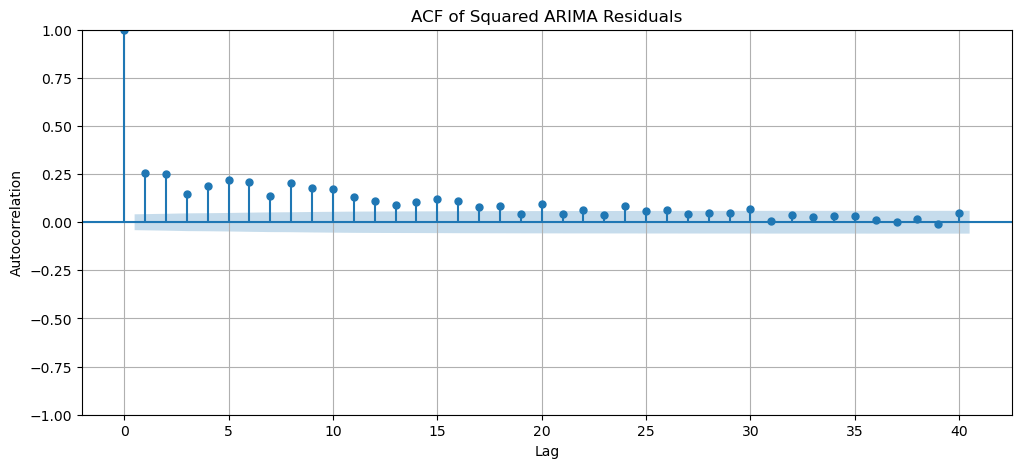

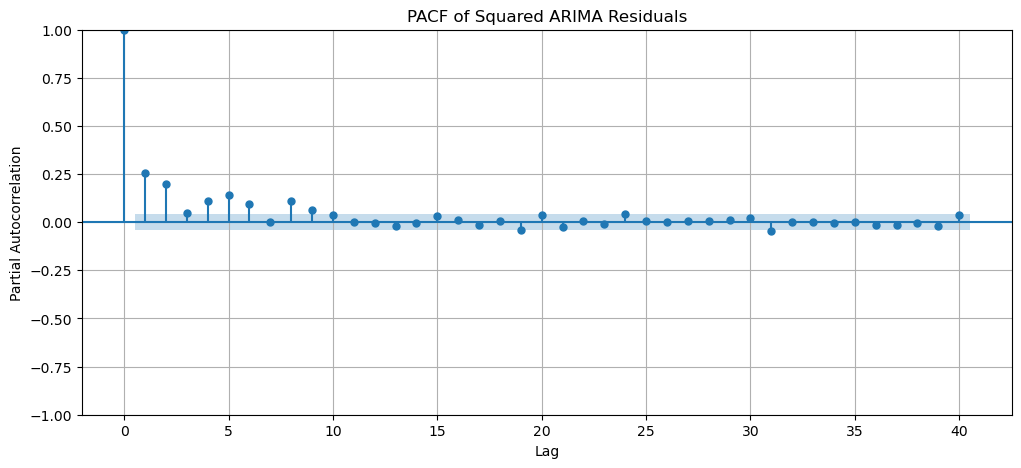

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

# Ենթադրելով, որ arima_residuals-ը ստացվել է ARIMA մոդելը մարզման տվյալների վրա կիրառելուց

# Հաշվարկել մնացորդների քառակուսիները
squared_residuals = arima_residuals ** 2

# Կառուցել մնացորդների քառակուսիների ACF գրաֆիկը
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(squared_residuals, lags=40, ax=ax)
plt.title('ACF of Squared ARIMA Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Կառուցել մնացորդների քառակուսիների PACF գրաֆիկը
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(squared_residuals, lags=40, ax=ax)
plt.title('PACF of Squared ARIMA Residuals')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [10]:
from arch import arch_model


arima_residuals = pd.Series(arima_residuals) # Եթե անհրաժեշտ է

# Սահմանել GARCH մոդելը (p=1, q=1) մնացորդների վրա
# mean='zero' կամ 'constant' կախված ARIMA մոդելի միջինից
# Այստեղ մենք GARCH-ը կիրառում ենք ARIMA-ի մնացորդների վրա, որոնց միջինը մոտ 0 է,
# ուստի կարող ենք օգտագործել mean='zero' կամ 'constant' (constant ավելի ապահով է)
# vol='Garch' նշանակում է GARCH մոդել, p-ն GARCH տերմինների կարգն է, q-ն՝ ARCH տերմինների
model_garch = arch_model(arima_residuals, mean='constant', vol='Garch', p=1, q=1)

# Կիրառել մոդելը
results_garch = model_garch.fit(disp='off') # disp='off' թաքցնում է մարզման մանրամասները

# Տպել GARCH մոդելի արդյունքների ամփոփումը
print("\nGARCH(1,1) Մոդելի Արդյունքները (ARIMA Մնացորդների Հիման Վրա):")
print(results_garch.summary())




GARCH(1,1) Մոդելի Արդյունքները (ARIMA Մնացորդների Հիման Վրա):
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6076.40
Distribution:                  Normal   AIC:                          -12144.8
Method:            Maximum Likelihood   BIC:                          -12121.9
                                        No. Observations:                 2263
Date:                Thu, Apr 24 2025   Df Residuals:                     2262
Time:                        14:38:07   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------------------------------------------

/Users/admin/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003331. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


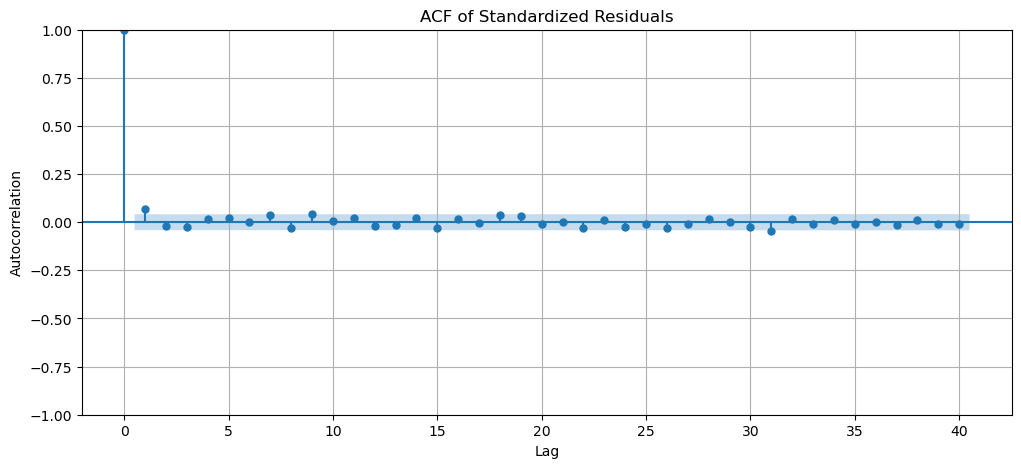

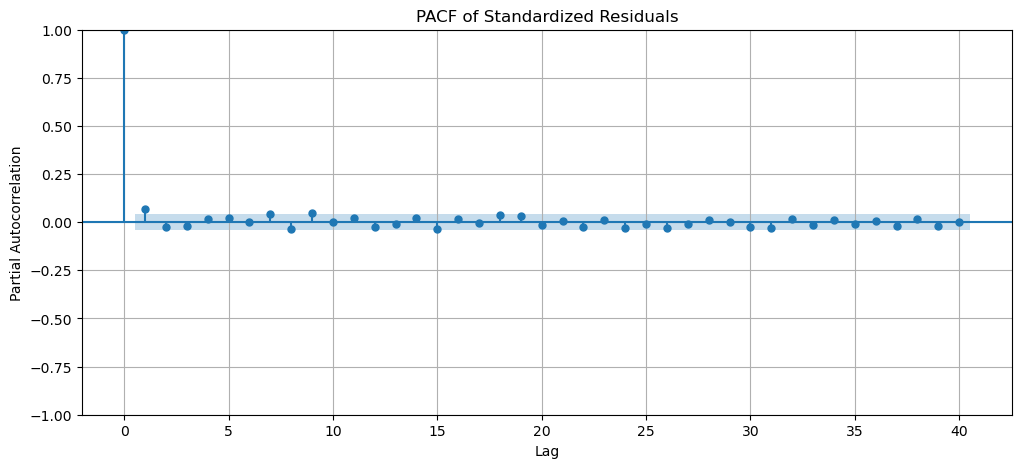

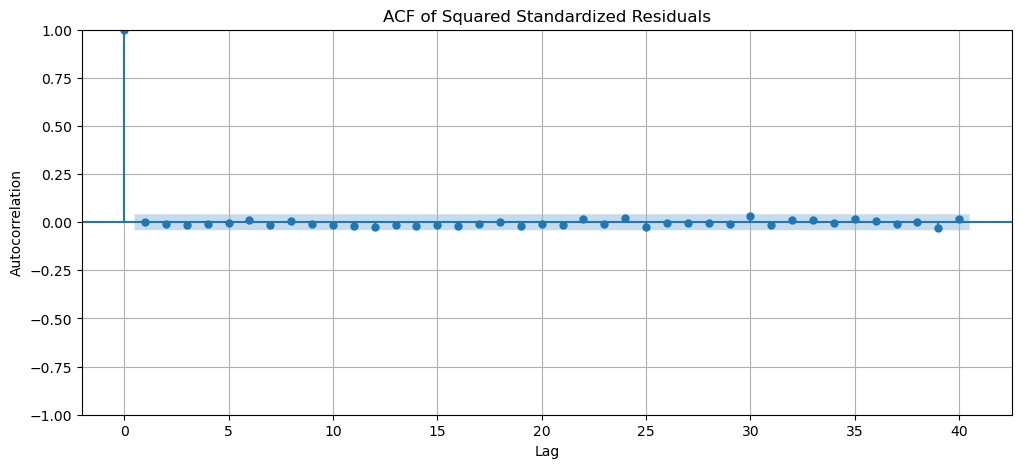

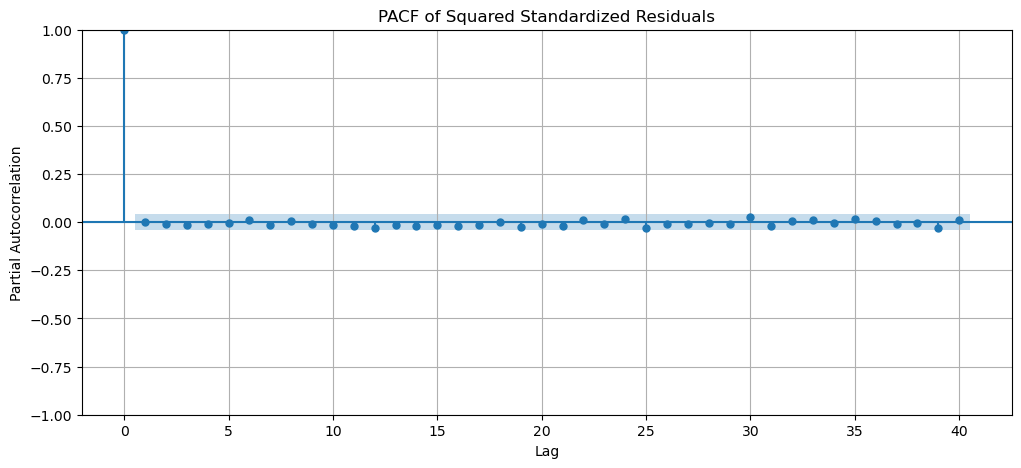

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

# Ենթադրելով, որ results_garch-ը ստացվել է GARCH մոդելը կիրառելուց

# Ստացեք ստանդարտացված մնացորդները
standardized_residuals = results_garch.resid / results_garch.conditional_volatility

# Կառուցել Ստանդարտացված Մնացորդների ACF գրաֆիկը
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(standardized_residuals.dropna(), lags=40, ax=ax) # dropna() քանի որ առաջին դիտարկումը կարող է NaN լինել
plt.title('ACF of Standardized Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Կառուցել Ստանդարտացված Մնացորդների PACF գրաֆիկը
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(standardized_residuals.dropna(), lags=40, ax=ax) # dropna()
plt.title('PACF of Standardized Residuals')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

# Հաշվարկել Ստանդարտացված Մնացորդների Քառակուսիները
squared_standardized_residuals = standardized_residuals.dropna() ** 2

# Կառուցել Ստանդարտացված Մնացորդների Քառակուսիների ACF գրաֆիկը
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(squared_standardized_residuals, lags=40, ax=ax)
plt.title('ACF of Squared Standardized Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Կառուցել Ստանդարտացված Մնացորդների Քառակուսիների PACF գրաֆիկը
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(squared_standardized_residuals, lags=40, ax=ax)
plt.title('PACF of Squared Standardized Residuals')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [12]:
from arch import arch_model
import pandas as pd
import numpy as np

# Ենթադրելով, որ train_data-ն և test_data-ն արդեն ստեղծված են

# Կիրառել Constant Mean - GARCH(1,1) մոդելը մարզման տվյալների վրա
# mean='constant' նշանակում է, որ միջինը մեկ կայուն արժեք է (ինչը մոտ է մեր ARIMA(1,0,1) արդյունքներին, որտեղ const-ը նշանակալի էր, իսկ AR/MA ոչ)
# vol='Garch', p=1, q=1 մնում է նույնը GARCH(1,1)-ի համար

constant_mean_garch_model = arch_model(train_data,
                                       mean='constant', # Սահմանել կայուն միջինի մոդելը
                                       vol='Garch',     # Սահմանել GARCH անկայունության մոդելը
                                       p=1,             # p'=1 GARCH տերմինի համար
                                       q=1)            # q'=1 ARCH տերմինի համար


# Կիրառել մոդելը
results_constant_mean_garch = constant_mean_garch_model.fit(disp='off')

# Տպել մոդելի արդյունքների ամփոփումը
print("\nConstant Mean - GARCH(1,1) Model Results (Training Data):")
print(results_constant_mean_garch.summary())

# Այժմ կատարել կանխատեսում թեստային ենթաբազմության ժամանակահատվածի համար
forecast_horizon = len(test_data)

# Օգտագործել forecast մեթոդը
forecasts_constant_mean_garch = results_constant_mean_garch.forecast(horizon=forecast_horizon)

print("\nԿանխատեսումներ (Constant Mean - GARCH):")
# forecasts.mean.iloc[-1] կլինի միայն մեկ կայուն արժեք (կանխատեսված միջինը)
print("Կանխատեսված Միջին (Log Returns):\n", forecasts_constant_mean_garch.mean.iloc[-1])
print("\nԿանխատեսված Վարիանս:\n", forecasts_constant_mean_garch.variance.iloc[-1])

conditional_volatility_forecasts_cmg = np.sqrt(forecasts_constant_mean_garch.variance.iloc[-1])
print("\nԿանխատեսված Անկայունություն:\n", conditional_volatility_forecasts_cmg)


Constant Mean - GARCH(1,1) Model Results (Training Data):
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6078.55
Distribution:                  Normal   AIC:                          -12149.1
Method:            Maximum Likelihood   BIC:                          -12126.2
                                        No. Observations:                 2263
Date:                Thu, Apr 24 2025   Df Residuals:                     2262
Time:                        14:38:08   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------

/Users/admin/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000335. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd # Համոզվելու համար pandas-ը ներմուծված է

# Ենթադրելով, որ test_data-ն և forecasts_constant_mean_garch-ը ստեղծված են նախորդ քայլերից

# Թեստային տվյալների իրական արժեքները (լոգարիթմական եկամտաբերությունները)
actual_log_returns = test_data

# Կանխատեսված միջին լոգարիթմական եկամտաբերությունները
# Օգտագործում ենք ճիշտ փոփոխականի անունը՝ forecasts_constant_mean_garch
# .mean.iloc[-1] վերցնում է կանխատեսված միջինները՝ համապատասխանեցված test_data-ի ինդեքսներին
predicted_log_returns_mean = forecasts_constant_mean_garch.mean.iloc[-1]

# Համոզվել, որ երկու շարքերը (actual_log_returns և predicted_log_returns_mean) նույն երկարությունն ունեն
if len(actual_log_returns) != len(predicted_log_returns_mean):
    print("Զգուշացում: Իրական և կանխատեսված արժեքների քանակը չի համընկնում։ Ստուգեք տվյալների բաժանումը և կանխատեսման հորիզոնը։")
    # Կարող եք այստեղ կանգնեցնել կամ հարմարեցնել շարքերը, եթե անհրաժեշտ է

# Հաշվարկել Root Mean Squared Error (RMSE) միջինի կանխատեսման համար
rmse_mean = np.sqrt(mean_squared_error(actual_log_returns, predicted_log_returns_mean))

print(f"\nՄիջինի Կանխատեսման RMSE-ը թեստային տվյալների վրա: {rmse_mean}")

# Այժմ ունեք մի թիվ, որը ցույց է տալիս ձեր մոդելի սխալը միջինը կանխատեսելիս։


Միջինի Կանխատեսման RMSE-ը թեստային տվյալների վրա: 0.014223355196336575



Վերածում ենք լոգ եկամտաբերության կանխատեսումները գների կանխատեսումների...

Առաջին մի քանի Կանխատեսված Գները:
Date
2024-01-02 00:00:00-05:00    192.862749
2024-01-03 00:00:00-05:00    193.196074
2024-01-04 00:00:00-05:00    193.529975
2024-01-05 00:00:00-05:00    193.864453
2024-01-08 00:00:00-05:00    194.199510
dtype: float64

Կառուցում ենք արդյունքների գրաֆիկը...


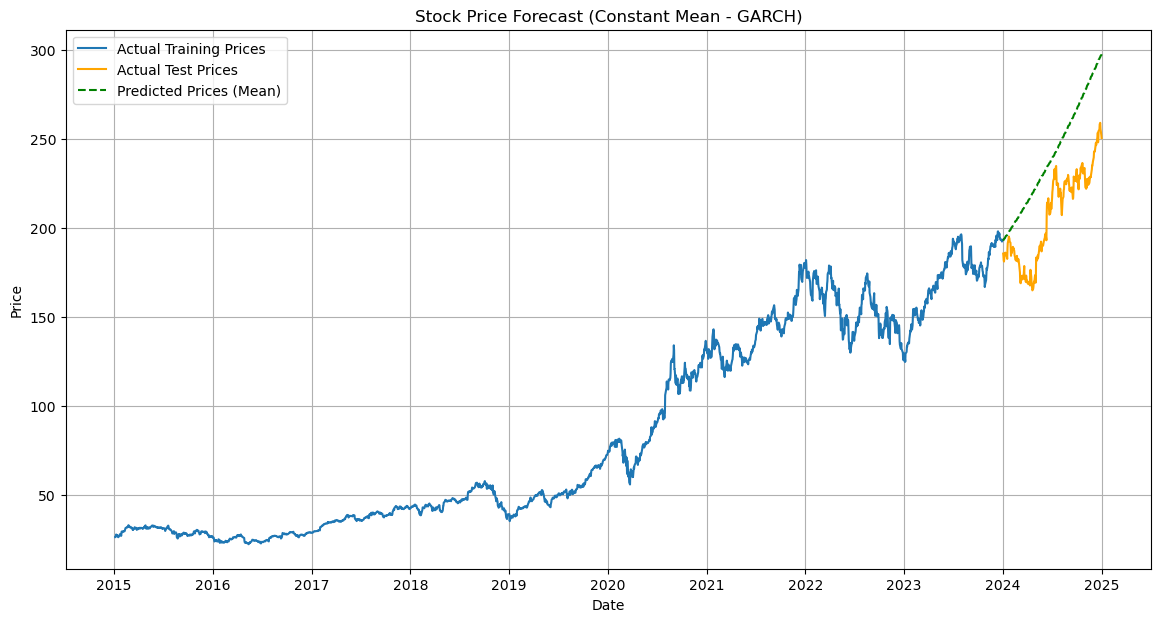

In [15]:
# --- 8. Լոգ Եկամտաբերության Կանխատեսումները Վերածել Գների Կանխատեսումների ---
print("\nՎերածում ենք լոգ եկամտաբերության կանխատեսումները գների կանխատեսումների...")
# Վերցնել մարզման տվյալների վերջին փակման գինը
last_train_price = ts_data.loc[train_data.index[-1]]

# Վերցնել կանխատեսված միջին լոգարիթմական եկամտաբերությունները
predicted_log_returns_mean = forecasts_constant_mean_garch.mean.iloc[-1]

# Հաշվարկել կուտակային կանխատեսված լոգ եկամտաբերությունները
cumulative_predicted_log_returns = predicted_log_returns_mean.cumsum()

# Ստեղծել pandas Series կանխատեսված գների համար՝ ճիշտ ամսաթվային ինդեքսով
# Օգտագործում ենք test_data-ի ինդեքսը, որպեսզի գները համապատասխանեն ճիշտ ամսաթվերին
predicted_prices = pd.Series(last_train_price * np.exp(cumulative_predicted_log_returns.values), index=test_data.index)

print("\nԱռաջին մի քանի Կանխատեսված Գները:")
print(predicted_prices.head())

# --- 9. Արդյունքների Գրաֆիկ (Իրական և Կանխատեսված Գներ) ---
print("\nԿառուցում ենք արդյունքների գրաֆիկը...")

# Այժմ predicted_prices-ի ինդեքսը test_data.index-ն է, որը պետք է լինի DatetimeIndex:
# Դեռևս անհրաժեշտ է մշակել հնարավոր ժամանակային գոտիները գրաֆիկի համատեղելիության համար։

# Համոզվել, որ բոլոր ինդեքսները առանց ժամանակային գոտու են գրաֆիկ կառուցելու համար
# predicted_prices ինդեքսը արդեն հիմնված է test_data-ի վրա, որը պետք է ճիշտ լինի
if predicted_prices.index.tzinfo is not None:
    predicted_prices.index = predicted_prices.index.tz_convert(None)

# Համոզվել, որ ts_data-ի ինդեքսների համապատասխան մասերն էլ են առանց ժամանակային գոտու
train_ts_dates = ts_data.loc[train_data.index].index
if train_ts_dates.tzinfo is not None:
    train_ts_dates = train_ts_dates.tz_convert(None)

test_ts_dates = ts_data.loc[test_data.index].index
if test_ts_dates.tzinfo is not None:
    test_ts_dates = test_ts_dates.tz_convert(None)


plt.figure(figsize=(14, 7))

# Օգտագործել առանց ժամանակային գոտու ինդեքսները և համապատասխան արժեքները գրաֆիկ կառուցելիս
plt.plot(train_ts_dates, ts_data.loc[train_data.index].values, label='Actual Training Prices')
plt.plot(test_ts_dates, ts_data.loc[test_data.index].values, label='Actual Test Prices', color='orange')
plt.plot(predicted_prices.index, predicted_prices.values, label='Predicted Prices (Mean)', color='green', linestyle='--')

plt.title('Stock Price Forecast (Constant Mean - GARCH)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()